# Fibonacci

The Fibonacci sequence is a series of numbers in which each number is the sum of the two numbers that come before it.

Coordinate calculations for spiral pattern:   
```
x(t) = r(t)⋅cos(t)   
y(t) = r(t)⋅sin⁡(t)   
y(t) = r(t)⋅sin(t)
``` 

Where `r(t)` is the radius at time `t`, and `t` is the angle that determines the spiral’s progression. In this case, `r(t)` will be the honeybee family tree Fibonacci numbers (drone and worker bee).

A drone is a male honeybee, and a worker is a female honeybee.   

---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
# Read in the dataset
df = pd.read_csv('./data/fibonacci_honeybee_data.csv')
display(df)

,sex,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,gen_11,gen_12,gen_13,gen_14
0,drone,1,2,3,5,8,13,21,34,55,89,144,233,377,610
1,worker,2,3,5,8,13,21,34,55,89,144,233,377,610,987


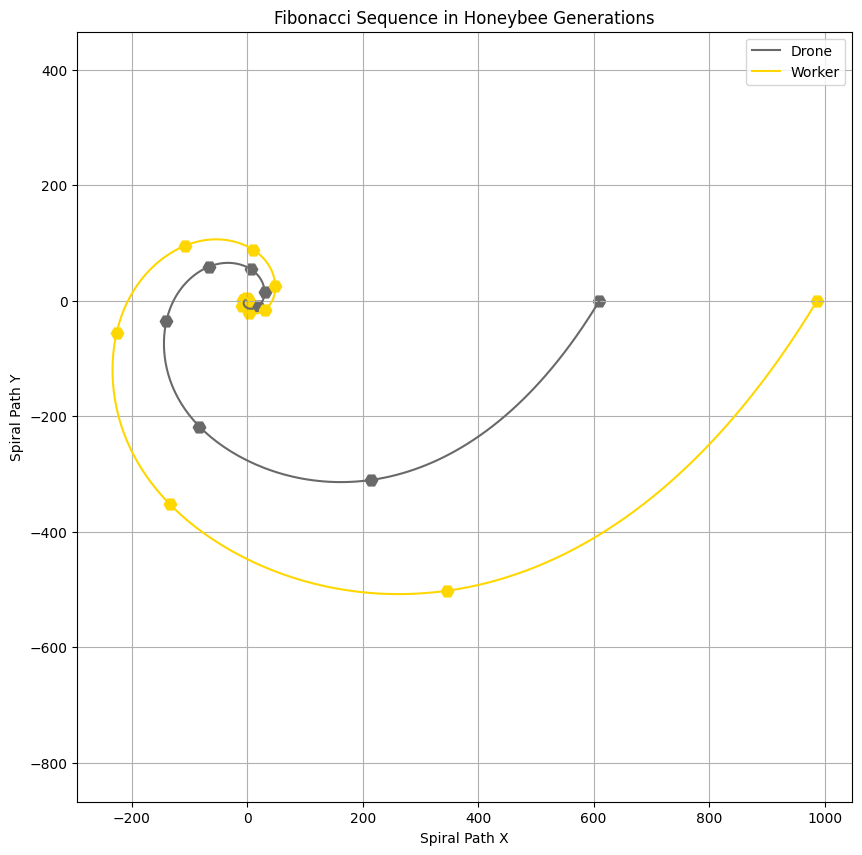

In [3]:
# Determine the x and y coordinate values by locating Fibonacci numbers for male and female bees (drone and worker)
drone = df.loc[df['sex'] == 'drone'].iloc[0, 1:].values
worker = df.loc[df['sex'] == 'worker'].iloc[0, 1:].values

# Find the number of generations
generations = len(drone)

# Create an angle (theta) for the spiral
theta = np.linspace(0, 4 * np.pi, generations)

# Create the radius for drone and worker spirals from the Fibonacci data
r_drone = np.array(drone)
r_worker = np.array(worker)

# Create the x, y coordinates for the drone and worker spirals
x_drone = r_drone * np.cos(theta)
y_drone = r_drone * np.sin(theta)

x_worker = r_worker * np.cos(theta)
y_worker = r_worker * np.sin(theta)

# Interpolate for smooth curves
t_drone = np.linspace(0, 1, generations) # Parameterize time
t_smooth = np.linspace(0, 1, 500)  # More points for smooth curves

# Drone smooth interpolation
x_drone_smooth = make_interp_spline(t_drone, x_drone)(t_smooth)
y_drone_smooth = make_interp_spline(t_drone, y_drone)(t_smooth)

# Worker smooth interpolation
x_worker_smooth = make_interp_spline(t_drone, x_worker)(t_smooth)
y_worker_smooth = make_interp_spline(t_drone, y_worker)(t_smooth)

# Clear any previous figures
plt.close('all')

# Plot the spirals
plt.figure(figsize=(10, 10))

# Drone data points
plt.plot(x_drone_smooth, y_drone_smooth, label="Drone", color="dimgray")
# Add in the original drone x-points
plt.scatter(x_drone, y_drone, color="dimgray", marker='H', s=80)

# Worker data points
plt.plot(x_worker_smooth, y_worker_smooth, label="Worker", color="gold")
# Add in the original worker x-points
plt.scatter(x_worker, y_worker, color="gold", marker='H', s=80)

# Customize plot
plt.grid(True)
# Ensure the aspect ratio is equal for the spiral
plt.axis('equal')
plt.title("Fibonacci Sequence in Honeybee Generations")
plt.xlabel("Spiral Path X")
plt.ylabel("Spiral Path Y")

# Show the plot
plt.legend()
plt.savefig('./assets/fibonacci_output.pdf')
plt.show()